In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
housing = fetch_california_housing(as_frame=True)


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Fetch the California housing dataset
data = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


In [3]:
from PSO_UQ1 import PSO_UQ
from GA_UQ1 import GA_UQ
PSO_fitnesses=[]
GA_instances=[]
resutls=[]

In [4]:
def run_once(name, model, X_train_scaled, y_train, X_test_scaled, y_test):
    import time as t
    from sklearn.metrics import r2_score, mean_squared_error
    import numpy as np

    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)

    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred) ** 0.5

    start_time = t.time()
    solution, solution_fitness, ga_instance = GA_UQ(list(y_test_pred), list(y_test))
    ga_duration = t.time() - start_time
    a_ga, b_ga = solution
    lower_ga = y_test_pred - b_ga
    upper_ga = y_test_pred + a_ga
    picp_ga = np.mean((y_test >= lower_ga) & (y_test <= upper_ga))
    mpiw_ga = np.mean(upper_ga - lower_ga)

    start_time = t.time()
    pos, cost, optimizer, fitness = PSO_UQ(list(y_test_pred), list(y_test))
    pso_duration = t.time() - start_time
    a_pso, b_pso = pos
    lower_pso = y_test_pred - b_pso
    upper_pso = y_test_pred + a_pso
    picp_pso = np.mean((y_test >= lower_pso) & (y_test <= upper_pso))
    mpiw_pso = np.mean(upper_pso - lower_pso)

    # Optionally track instances
    PSO_fitnesses.append(fitness)
    GA_instances.append(ga_instance)

    return {
        "Model": name,
        "R2": test_r2,
        "RMSE": test_rmse,
        "a_PSO": a_pso,
        "b_PSO": b_pso,
        "Fitness_PSO": -cost,
        "PICP_PSO": picp_pso,
        "MPIW_PSO": mpiw_pso,
        "time_PSO": pso_duration,
        "a_GA": a_ga,
        "b_GA": b_ga,
        "Fitness_GA": solution_fitness,
        "PICP_GA": picp_ga,
        "MPIW_GA": mpiw_ga,
        "time_GA": ga_duration
    }


In [5]:
def trainAndreport(name,model,N_RUNS=30):
    global results
    for i in range(N_RUNS):
        print(f"Run {i+1}/{N_RUNS}")
        result = run_once(name, model, X_train_scaled, y_train, X_test_scaled, y_test)
        results.append(result)




In [6]:
results = []

In [7]:
from sklearn.linear_model import LinearRegression
trainAndreport("Linear Regression",LinearRegression())


Run 1/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 2/30


2025-06-08 12:38:58,751 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:39:06,017 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03347881473551517, best pos: [1.51491587 1.57766993]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 3/30


2025-06-08 12:39:13,067 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:39:19,707 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03348819359191913, best pos: [1.47797224 1.5657675 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 4/30


2025-06-08 12:39:26,040 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:39:32,470 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033468920370421436, best pos: [1.53516714 1.56525252]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 5/30


2025-06-08 12:39:38,601 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:39:45,036 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033486070794209455, best pos: [1.47957668 1.57876003]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 6/30


2025-06-08 12:39:51,381 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0334
2025-06-08 12:39:57,799 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03344029000792527, best pos: [1.56907586 1.57727043]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 7/30


2025-06-08 12:40:03,965 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0334
2025-06-08 12:40:10,116 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03337591642997591, best pos: [1.42382704 1.70481435]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 8/30


2025-06-08 12:40:16,470 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:40:23,472 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033484836106695406, best pos: [1.45128002 1.54498344]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 9/30


2025-06-08 12:40:29,582 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:40:37,147 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03348890005661162, best pos: [1.47552243 1.54841585]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 10/30


2025-06-08 12:40:43,239 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0334
2025-06-08 12:40:49,931 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03343663867681872, best pos: [1.5322333  1.66823154]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 11/30


2025-06-08 12:40:56,410 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:41:03,909 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03348900387458754, best pos: [1.47616577 1.55291337]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 12/30


2025-06-08 12:41:12,192 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:41:19,076 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033489004901180945, best pos: [1.47607941 1.55258151]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 13/30


2025-06-08 12:41:25,640 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:41:33,745 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033489003551859006, best pos: [1.475649   1.55243345]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 14/30


2025-06-08 12:41:40,090 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:41:47,743 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03346173185843663, best pos: [1.51240048 1.49424927]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 15/30


2025-06-08 12:41:56,409 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0334
2025-06-08 12:42:04,485 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03337912343145507, best pos: [1.59943549 1.50115188]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 16/30


2025-06-08 12:42:12,353 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0334
2025-06-08 12:42:19,304 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03344193792450101, best pos: [1.41985615 1.62644185]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 17/30


2025-06-08 12:42:25,832 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0334
2025-06-08 12:42:33,056 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033446586988374466, best pos: [1.55839515 1.5401804 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 18/30


2025-06-08 12:42:39,341 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:42:46,404 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033487278389359984, best pos: [1.46445728 1.56341637]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 19/30


2025-06-08 12:42:52,899 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:42:59,300 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03348883855998613, best pos: [1.47638001 1.55836956]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 20/30


2025-06-08 12:43:05,579 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0329
2025-06-08 12:43:14,354 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.032869049714842495, best pos: [1.84909956 1.67206518]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 21/30


2025-06-08 12:43:23,491 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:43:32,955 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033488258826676276, best pos: [1.4675421  1.54491669]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppD

Run 22/30


2025-06-08 12:43:42,072 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:43:50,767 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03345563585122097, best pos: [1.4257197  1.48130507]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 23/30


2025-06-08 12:43:59,037 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:44:07,916 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03348796757342847, best pos: [1.4725915  1.56601072]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 24/30


2025-06-08 12:44:15,709 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0334
2025-06-08 12:44:24,433 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.033433434533229, best pos: [1.44254536 1.6628244 ]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData

Run 25/30


2025-06-08 12:44:32,674 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:44:41,669 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03348534903157888, best pos: [1.47210329 1.52522156]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 26/30


2025-06-08 12:44:50,321 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:44:59,338 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03347742956141199, best pos: [1.43693308 1.56366923]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 27/30


2025-06-08 12:45:08,573 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:45:17,750 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03348075545323703, best pos: [1.46833551 1.59625717]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 28/30


2025-06-08 12:45:26,184 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0334
2025-06-08 12:45:34,728 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03343353510932161, best pos: [1.5316654  1.67292477]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDa

Run 29/30


2025-06-08 12:45:43,482 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0335
2025-06-08 12:45:53,761 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0334662462153473, best pos: [1.52261455 1.62023711]
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppDat

Run 30/30


2025-06-08 12:46:02,946 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-0.0333
2025-06-08 12:46:12,455 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.03328262193248514, best pos: [1.62327412 1.75431349]


In [8]:
from sklearn.svm import SVR
trainAndreport("SVR",SVR())


Run 1/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 2/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 3/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 4/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 5/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 6/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 7/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 8/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 9/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 10/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 11/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 12/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 13/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 14/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 15/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 16/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 17/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 18/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 19/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 20/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 21/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 22/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 23/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 24/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 25/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 26/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 27/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 28/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 29/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 30/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

In [ ]:
from sklearn.ensemble import RandomForestRegressor
trainAndreport("Random Forest", RandomForestRegressor(random_state=42))

Run 1/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 2/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 3/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 4/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 5/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 6/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 7/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 8/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 9/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
trainAndreport("GradientBoostingRegressor", GradientBoostingRegressor(random_state=42))

Run 1/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 2/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 3/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 4/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 5/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 6/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 7/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 8/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 9/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 10/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 11/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 12/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 13/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 14/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 15/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 16/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 17/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 18/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 19/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 20/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 21/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 22/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 23/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 24/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 25/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 26/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 27/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 28/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 29/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

Run 30/30


c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygad\pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

In [ ]:
# Create a DataFrame to display results
import pandas as pd
results_df = pd.DataFrame(results)
results_df=results_df.round(3)
print(results_df)

                         Model     R2   RMSE  a_PSO  b_PSO  Fitness_PSO  \
0            Linear Regression  0.576  0.746  1.495  1.563        0.033   
1            Linear Regression  0.576  0.746  1.548  1.574        0.033   
2            Linear Regression  0.576  0.746  1.520  1.618        0.033   
3            Linear Regression  0.576  0.746  1.476  1.553        0.033   
4            Linear Regression  0.576  0.746  1.485  1.521        0.033   
..                         ...    ...    ...    ...    ...          ...   
115  GradientBoostingRegressor  0.776  0.542  1.130  1.238        0.046   
116  GradientBoostingRegressor  0.776  0.542  1.133  1.179        0.046   
117  GradientBoostingRegressor  0.776  0.542  1.084  1.129        0.046   
118  GradientBoostingRegressor  0.776  0.542  1.248  1.391        0.046   
119  GradientBoostingRegressor  0.776  0.542  1.140  1.173        0.046   

     PICP_PSO  MPIW_PSO  time_PSO   a_GA   b_GA  Fitness_GA  PICP_GA  MPIW_GA  \
0       0.948     

In [ ]:
# 📊 1. Mean Table per Model
mean_df = results_df.groupby("Model").mean(numeric_only=True).reset_index()
print("\n📌 Mean Table Per Model:")
print(mean_df.to_string(index=False))


📌 Mean Table Per Model:
                    Model    R2  RMSE    a_PSO    b_PSO  Fitness_PSO  PICP_PSO  MPIW_PSO  time_PSO     a_GA     b_GA  Fitness_GA  PICP_GA  MPIW_GA  time_GA
GradientBoostingRegressor 0.776 0.542 1.151433 1.211267     0.045967  0.953967  2.362800  6.543133 1.117900 1.171967       0.046 0.951567 2.289767 6.229033
        Linear Regression 0.576 0.746 1.473400 1.567900     0.033000  0.946833  3.041300  7.310800 1.477367 1.554267       0.033 0.947167 3.031567 6.773167
            Random Forest 0.805 0.505 1.046900 1.037833     0.050800  0.940867  2.084700  6.303167 0.975900 0.979800       0.051 0.932733 1.955800 6.051233
                      SVR 0.640 0.687 1.202033 1.370533     0.041000  0.925200  2.572667  9.561800 1.176233 1.355067       0.041 0.922100 2.531467 8.265400


In [ ]:
import numpy as np
from scipy.stats import t as t_dist

# Your original mean table
mean_df = results_df.groupby("Model").mean(numeric_only=True).reset_index()

# CI function
def mean_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean_val = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin = sem * t_dist.ppf((1 + confidence) / 2.0, n - 1)
    return 2 * margin  # total CI width

# Compute CI width for each model
ci_data = []
for model, group in results_df.groupby("Model"):
    row = {"Model": model}
    for col in ["MPIW_PSO", "MPIW_GA"]:
        if col in group.columns:
            ci_width = mean_confidence_interval(group[col].dropna())
            row[f"{col}_CI95"] = round(ci_width, 4)
    ci_data.append(row)

# Create CI DataFrame
ci_df = pd.DataFrame(ci_data)

# Merge into mean_df
mean_df = mean_df.merge(ci_df, on="Model", how="left")

# Print
print("\n📌 Mean Table Per Model (with 95% CI width for MPIW):")
print(mean_df.to_string(index=False))



📌 Mean Table Per Model (with 95% CI width for MPIW):
                    Model    R2  RMSE    a_PSO    b_PSO  Fitness_PSO  PICP_PSO  MPIW_PSO  time_PSO     a_GA     b_GA  Fitness_GA  PICP_GA  MPIW_GA  time_GA  MPIW_PSO_CI95  MPIW_GA_CI95
GradientBoostingRegressor 0.776 0.542 1.151433 1.211267     0.045967  0.953967  2.362800  6.543133 1.117900 1.171967       0.046 0.951567 2.289767 6.229033         0.1061        0.0058
        Linear Regression 0.576 0.746 1.473400 1.567900     0.033000  0.946833  3.041300  7.310800 1.477367 1.554267       0.033 0.947167 3.031567 6.773167         0.0473        0.0060
            Random Forest 0.805 0.505 1.046900 1.037833     0.050800  0.940867  2.084700  6.303167 0.975900 0.979800       0.051 0.932733 1.955800 6.051233         0.1508        0.0058
                      SVR 0.640 0.687 1.202033 1.370533     0.041000  0.925200  2.572667  9.561800 1.176233 1.355067       0.041 0.922100 2.531467 8.265400         0.0684        0.0053


In [ ]:
newdf.columns

Index(['Model', 'R2', 'RMSE', 'a_PSO', 'b_PSO', 'PICP_PSO', 'MPIW_PSO', 'a_GA',
       'b_GA', 'Fitness_GA', 'PICP_GA', 'MPIW_GA', 'MPIW_PSO_CI95',
       'MPIW_GA_CI95'],
      dtype='object')

In [ ]:
newdf=mean_df.drop(columns=['time_PSO','time_GA','Fitness_PSO'])
print(newdf[['Model', 'R2', 'RMSE', 'a_PSO', 'b_PSO', 'PICP_PSO', 'MPIW_PSO','MPIW_PSO_CI95', 'a_GA',
       'b_GA',  'PICP_GA', 'MPIW_GA', 
       'MPIW_GA_CI95']])

                       Model     R2   RMSE     a_PSO     b_PSO  PICP_PSO  \
0  GradientBoostingRegressor  0.776  0.542  1.151433  1.211267  0.953967   
1          Linear Regression  0.576  0.746  1.473400  1.567900  0.946833   
2              Random Forest  0.805  0.505  1.046900  1.037833  0.940867   
3                        SVR  0.640  0.687  1.202033  1.370533  0.925200   

   MPIW_PSO  MPIW_PSO_CI95      a_GA      b_GA   PICP_GA   MPIW_GA  \
0  2.362800         0.1061  1.117900  1.171967  0.951567  2.289767   
1  3.041300         0.0473  1.477367  1.554267  0.947167  3.031567   
2  2.084700         0.1508  0.975900  0.979800  0.932733  1.955800   
3  2.572667         0.0684  1.176233  1.355067  0.922100  2.531467   

   MPIW_GA_CI95  
0        0.0058  
1        0.0060  
2        0.0058  
3        0.0053  


In [ ]:
from scipy.stats import t as t_dist
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean_val = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin = sem * t_dist.ppf((1 + confidence) / 2.0, n - 1)
    return mean_val, mean_val - margin, mean_val + margin

# Compute mean and 95% CI for each column
summary_data = []
for metric in results_df.drop(columns=["Model"]).columns:
    values = results_df[metric].dropna()  # drop NAs just in case
    mean, lower, upper = mean_confidence_interval(values)
    summary_data.append({
        "Metric": metric,
        "Mean": round(mean, 4),
        "95% CI Lower": round(lower, 4),
        "95% CI Upper": round(upper, 4)
    })

# Create and print summary DataFrame
summary_df = pd.DataFrame(summary_data)
print("\n📊 Summary Table with 95% Confidence Intervals:")
print(summary_df.to_string(index=False))


📊 Summary Table with 95% Confidence Intervals:
     Metric   Mean  95% CI Lower  95% CI Upper
         R2 0.6992        0.6821        0.7164
       RMSE 0.6200        0.6019        0.6381
      a_PSO 1.2184        1.1847        1.2521
      b_PSO 1.2969        1.2587        1.3351
Fitness_PSO 0.0427        0.0415        0.0439
   PICP_PSO 0.9417        0.9395        0.9440
   MPIW_PSO 2.5154        2.4475        2.5833
   time_PSO 7.4297        7.0098        7.8496
       a_GA 1.1869        1.1536        1.2201
       b_GA 1.2653        1.2266        1.3040
 Fitness_GA 0.0428        0.0415        0.0440
    PICP_GA 0.9384        0.9363        0.9405
    MPIW_GA 2.4522        2.3810        2.5233
    time_GA 6.8297        6.5485        7.1109


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t as t_dist

def mean_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean_val = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin = sem * t_dist.ppf((1 + confidence) / 2.0, n - 1)
    return mean_val, 2 * margin  # Return mean and total width of CI

# Create a compact summary table for time only (across all models)
summary_data = []
for opt in ['time_PSO', 'time_GA']:
    if opt in results_df.columns:
        values = results_df[opt].dropna()
        mean, ci_width = mean_confidence_interval(values)
        summary_data.append({
            "Dataset":"California",
            "Optimizer": opt.replace("time_", ""),
            "Mean Time (s)": round(mean, 4),
            "95% CI Width": round(ci_width, 4)
        })

summary_df = pd.DataFrame(summary_data)

# Display result
print("\n📊 Average Optimization Time and 95% CI Width (All Models Combined):")
print(summary_df.to_string(index=False))


📊 Average Optimization Time and 95% CI Width (All Models Combined):
   Dataset Optimizer  Mean Time (s)  95% CI Width
California       PSO         7.4297        0.8398
California        GA         6.8297        0.5624


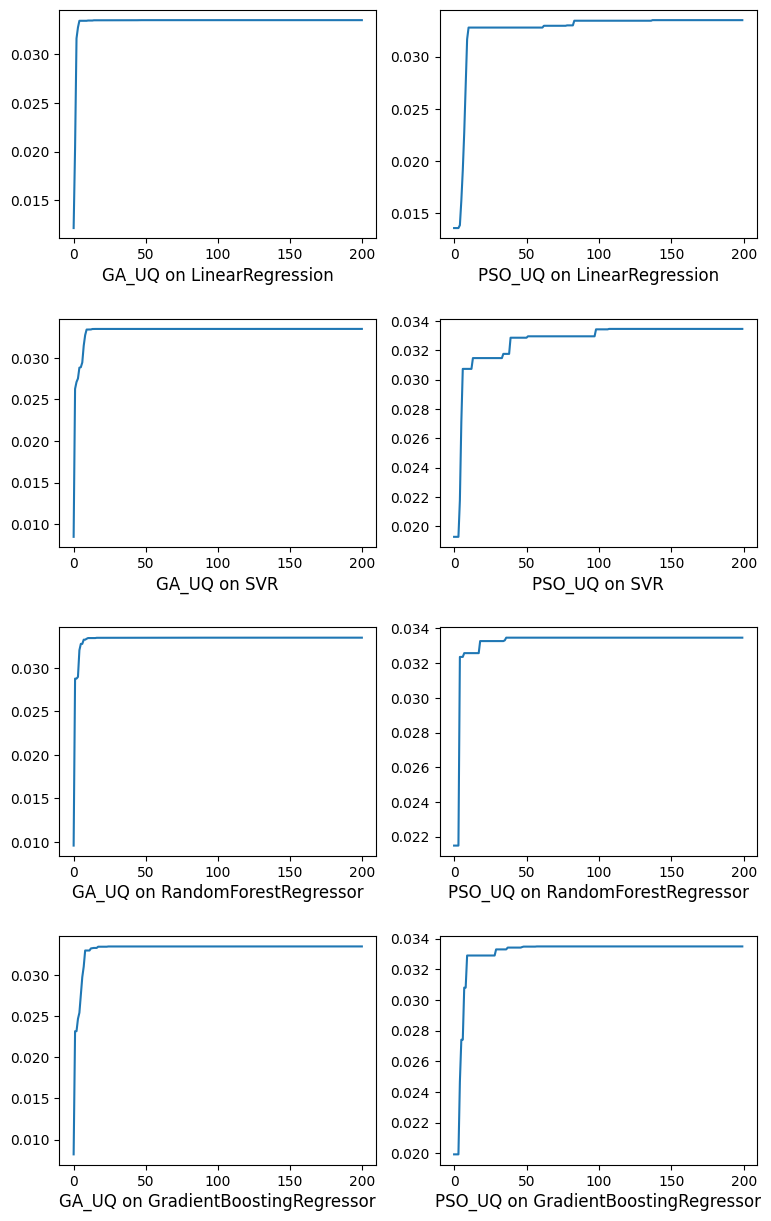

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,2,figsize=(9,15))
names=["LinearRegression","SVR","RandomForestRegressor","GradientBoostingRegressor"]
for i in range(4):
    y=np.maximum.accumulate(GA_instances[i].solutions_fitness)[::16]
    x=range(len(y))
    ax[i,0].plot(x,y)
    x=range(len(PSO_fitnesses[i]))
    y=PSO_fitnesses[i]
    ax[i,1].plot(x,y)
    ax[i,0].set_title("GA_UQ on "+names[i],y=-.22)
    ax[i,1].set_title("PSO_UQ on "+names[i],y=-.22)
plt.subplots_adjust(hspace=0.35)

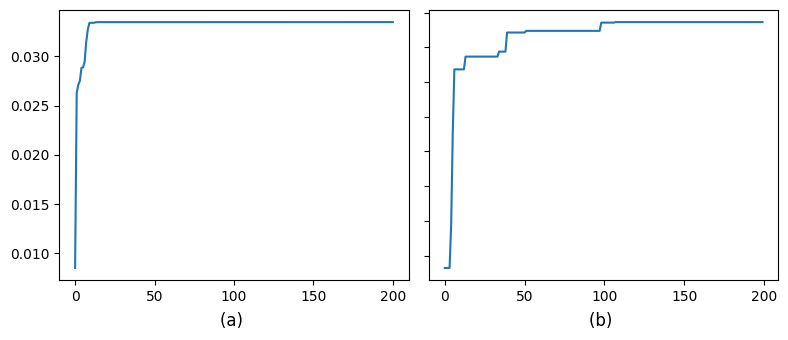

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

names = ["LinearRegression", "SVR", "RandomForestRegressor", "GradientBoostingRegressor"]
i = 1

# First plot (GA)
y1 = np.maximum.accumulate(GA_instances[i].solutions_fitness)[::16]
x1 = range(len(y1))
ax[0].plot(x1, y1)

# Second plot (PSO)
x2 = range(len(PSO_fitnesses[i]))
y2 = PSO_fitnesses[i]
ax[1].plot(x2, y2)

# Balance y-axis
ymin = min(min(y1), min(y2))
ymax = max(max(y1), max(y2))
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)

# Optional: share y-ticks
yticks = np.linspace(ymin, ymax, num=5)
ax[0].set_yticks(yticks)
ax[1].set_yticks(yticks)

# Aesthetics
ax[0].set_title("(a)", y=-0.2)
ax[1].set_title("(b)", y=-0.2)
ax[1].set_yticklabels([])  # Keep the right plot clean, optional

plt.tight_layout()
plt.savefig('SVR.pdf', dpi=300)

